<a href="https://colab.research.google.com/github/HO94/practice02/blob/main/motorcycle_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 패키지 불러오기

import pickle # 리스트 안의 데이터프레임 형태 저장
import requests # api 요청
import json
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/가해자차종 또는 피해자차종이 이륜차인 교통사고 정보(2015~2019년).csv', encoding='euc-kr')

In [ ]:
data.head()

,발생일,발생시간,요일,사고내용,발생지_시도,발생지_시군구,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구_대분류,가해자보호장구,피해당사자종별,피해자성별,피해자연령,피해자신체상해정도,피해자보호장구_대분류,피해자보호장구
0,20150101,00시,목,중상,경기,시흥시,신천동,0,1,1,0,차대차,측면충돌,측면충돌,기타,포장,건조,맑음,교차로,교차로내,이륜차,38세,남,중상,안전모,착용,승용차,남,48세,경상,NaN,NaN
1,20150101,01시,목,경상,서울,금천구,독산동,0,0,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로내,승용차,56세,남,상해없음,NaN,NaN,이륜차,남,21세,경상,안전모,착용
2,20150101,01시,목,중상,부산,동래구,온천동,0,1,0,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,건조,맑음,단일로,기타단일로,승용차,67세,남,상해없음,NaN,NaN,이륜차,남,18세,중상,안전모,착용
3,20150101,01시,목,부상신고,대구,중구,동성로2가,0,0,0,1,차대차,기타,기타,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,이륜차,17세,남,부상신고,안전모,착용,승용차,남,38세,상해없음,NaN,NaN
4,20150101,05시,목,경상,경기,부천시,중동,0,0,2,0,차대차,측면충돌,측면충돌,신호위반,포장,건조,맑음,교차로,교차로내,이륜차,60세,남,상해없음,안전모,착용불명,승용차,남,52세,경상,NaN,NaN


In [ ]:
#원본 데이터 유지, 사용데이터 복사
data.use = data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
data.use

,발생일,발생시간,요일,사고내용,발생지_시도,발생지_시군구,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구_대분류,가해자보호장구,피해당사자종별,피해자성별,피해자연령,피해자신체상해정도,피해자보호장구_대분류,피해자보호장구
0,20150101,00시,목,중상,경기,시흥시,신천동,0,1,1,0,차대차,측면충돌,측면충돌,기타,포장,건조,맑음,교차로,교차로내,이륜차,38세,남,중상,안전모,착용,승용차,남,48세,경상,NaN,NaN
1,20150101,01시,목,경상,서울,금천구,독산동,0,0,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로내,승용차,56세,남,상해없음,NaN,NaN,이륜차,남,21세,경상,안전모,착용
2,20150101,01시,목,중상,부산,동래구,온천동,0,1,0,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,건조,맑음,단일로,기타단일로,승용차,67세,남,상해없음,NaN,NaN,이륜차,남,18세,중상,안전모,착용
3,20150101,01시,목,부상신고,대구,중구,동성로2가,0,0,0,1,차대차,기타,기타,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,이륜차,17세,남,부상신고,안전모,착용,승용차,남,38세,상해없음,NaN,NaN
4,20150101,05시,목,경상,경기,부천시,중동,0,0,2,0,차대차,측면충돌,측면충돌,신호위반,포장,건조,맑음,교차로,교차로내,이륜차,60세,남,상해없음,안전모,착용불명,승용차,남,52세,경상,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160128,20191231,22시,화,경상,경기,수원시,탑동,0,0,5,0,차대차,추돌,추돌,안전거리 미확보,포장,건조,맑음,단일로,기타단일로,이륜차,57세,남,경상,안전모,착용,승용차,남,49세,경상,NaN,NaN
160129,20191231,23시,화,경상,부산,연제구,연산동,0,0,2,0,차대사람,횡단중,횡단중,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로횡단보도내,이륜차,30세,남,경상,안전모,착용,보행자,남,47세,경상,NaN,NaN
160130,20191231,23시,화,중상,경기,평택시,소사동,0,1,0,0,차대차,측면충돌,측면충돌,기타,포장,건조,맑음,교차로,교차로내,승용차,46세,여,상해없음,NaN,NaN,이륜차,남,31세,중상,안전모,착용
160131,20191231,23시,화,중상,충북,청주시,율량동,0,1,0,0,차대차,기타,기타,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,60세,남,상해없음,NaN,NaN,이륜차,남,22세,중상,안전모,착용


In [ ]:
#발생일 년월 까지만 표시
data.use['발생일'] =data['발생일']//100
data.use['발생일']

0         201501
1         201501
2         201501
3         201501
4         201501
           ...  
160128    201912
160129    201912
160130    201912
160131    201912
160132    201912
Name: 발생일, Length: 160133, dtype: int64

In [ ]:
#변수 선택
data.use = data.use[['발생일','발생시간','발생지_시도','사고유형','가해자법규위반','노면상태_대분류','기상상태','도로형태','가해당사자종별','가해자연령','가해자성별','가해자신체상해정도','가해자보호장구','피해당사자종별','피해자연령','피해자성별','피해자신체상해정도','피해자보호장구']]

In [ ]:
data.use.head()

,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구
0,201501,00시,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,NaN
1,201501,01시,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,NaN,이륜차,21세,남,경상,착용
2,201501,01시,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,NaN,이륜차,18세,남,중상,착용
3,201501,01시,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,NaN
4,201501,05시,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,NaN


In [ ]:
#발생시간 숫자화
data.use['발생시간'] = data.use['발생시간'].str.split('시').str[0]
data.use['발생시간'] = pd.to_numeric(data.use['발생시간'])
data.use.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구
0,201501,00,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,NaN
1,201501,01,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,NaN,이륜차,21세,남,경상,착용
2,201501,01,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,NaN,이륜차,18세,남,중상,착용
3,201501,01,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,NaN
4,201501,05,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,NaN


In [ ]:
#발생시간, 24시를 6개 범주화

data.use['발생시간_범주'] = np.nan
data.use.loc[(data.use['발생시간']<4), data.use['발생시간_범주']] = '새벽'
data.use.loc[(data.use['발생시간']>4)&(data.use['발생시간']<=8), data.use['발생시간_범주']] = '아침'
data.use.loc[(data.use['발생시간']>8)&(data.use['발생시간']<=12), data.use['발생시간_범주']] = '오전'
data.use.loc[(data.use['발생시간']>12)&(data.use['발생시간']<=16), data.use['발생시간_범주']] = '오후'
data.use.loc[(data.use['발생시간']>16)&(data.use['발생시간']<=20), data.use['발생시간_범주']] = '저녁'
data.use.loc[(data.use['발생시간']>20), data.use['발생시간_범주']] = '밤'
data.use.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

KeyboardInterrupt: ignored

In [ ]:
data.use.columns

Index([      '발생일',      '발생시간',    '발생지_시도',      '사고유형',   '가해자법규위반',
        '노면상태_대분류',      '기상상태',      '도로형태',   '가해당사자종별',     '가해자연령',
           '가해자성별', '가해자신체상해정도',   '가해자보호장구',   '피해당사자종별',     '피해자연령',
           '피해자성별', '피해자신체상해정도',   '피해자보호장구',   '발생시간_범주',         nan],
      dtype='object')

In [ ]:
#열 이름 정리
data.use = data.use.drop(['발생시간_범주'], axis=1)

data.use.columns = ['발생일',      '발생시간',    '발생지_시도',      '사고유형',   '가해자법규위반',
        '노면상태_대분류',      '기상상태',      '도로형태',   '가해당사자종별',     '가해자연령',
           '가해자성별', '가해자신체상해정도',   '가해자보호장구',   '피해당사자종별',     '피해자연령',
           '피해자성별', '피해자신체상해정도',   '피해자보호장구', '발생시간_범주']
data.use.head()

KeyError: ignored

In [ ]:
#발생시간, 24시를 6개 범주화

data.use['발생시간_범주화'] = np.nan
data.use['발생시간_범주화'] = data.use['발생시간_범주'].factorize()[0]
data.use.head()

data.use.to_csv('Motorcycle001.csv') # 파일로 저장

In [ ]:
#1차 전처리파일 저장
files.download('Motorcycle001.csv')

NameError: ignored

In [ ]:
moc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Motorcycle001.csv', encoding='utf-8')

In [ ]:
moc.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,NaN,새벽,0
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,NaN,이륜차,21세,남,경상,착용,새벽,0
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,NaN,이륜차,18세,남,중상,착용,새벽,0
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,NaN,새벽,0
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,NaN,아침,1


In [ ]:
#보호장구 결측값, 미착용으로 변경
moc['가해자보호장구'] = moc['가해자보호장구'].fillna('미착용')
moc['피해자보호장구'] = moc['피해자보호장구'].fillna('미착용')
moc.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,미착용,새벽,0
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,미착용,이륜차,21세,남,경상,착용,새벽,0
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,미착용,이륜차,18세,남,중상,착용,새벽,0
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,미착용,새벽,0
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,미착용,아침,1


In [ ]:
#이륜차 운전자(가해자, 피해자)를 1로 표시
moc['이륜차가해자'] = np.nan
moc['이륜차피해자'] = np.nan

moc.loc[(moc['가해당사자종별']=='이륜차'), moc['이륜차가해자']] = 1
moc.loc[(moc['가해당사자종별']!='이륜차'), moc['이륜차가해자']] = 0

moc.loc[(moc['피해당사자종별']=='이륜차'), moc['이륜차피해자']] = 1
moc.loc[(moc['피해당사자종별']!='이륜차'), moc['이륜차피해자']] = 0

moc.head()

KeyboardInterrupt: ignored

In [ ]:
moc.columns

Index([      '발생일',      '발생시간',    '발생지_시도',      '사고유형',   '가해자법규위반',
        '노면상태_대분류',      '기상상태',      '도로형태',   '가해당사자종별',     '가해자연령',
           '가해자성별', '가해자신체상해정도',   '가해자보호장구',   '피해당사자종별',     '피해자연령',
           '피해자성별', '피해자신체상해정도',   '피해자보호장구',   '발생시간_범주',  '발생시간_범주화',
               nan],
      dtype='object')

In [ ]:
#열 이름 정리
moc = moc.drop(['Unnamed: 0', '이륜차가해자'], axis=1)

moc.columns = ['발생일',      '발생시간',    '발생지_시도',      '사고유형',   '가해자법규위반',
        '노면상태_대분류',      '기상상태',      '도로형태',   '가해당사자종별',     '가해자연령',
           '가해자성별', '가해자신체상해정도',   '가해자보호장구',   '피해당사자종별',     '피해자연령',
           '피해자성별', '피해자신체상해정도',   '피해자보호장구', '발생시간_범주','발생시간_범주화', '이륜차가해자']

moc = moc.drop([ '이륜차피해자'], axis=1)

moc.columns = ['발생일',      '발생시간',    '발생지_시도',      '사고유형',   '가해자법규위반',
        '노면상태_대분류',      '기상상태',      '도로형태',   '가해당사자종별',     '가해자연령',
           '가해자성별', '가해자신체상해정도',   '가해자보호장구',   '피해당사자종별',     '피해자연령',
           '피해자성별', '피해자신체상해정도',   '피해자보호장구', '발생시간_범주','발생시간_범주화', '이륜차가해자', '이륜차피해자']

moc.head()

KeyError: ignored

In [ ]:
#나이 불명 처리
moc['가해자연령']=='불명'

0         False
1         False
2         False
3         False
4         False
          ...  
160128    False
160129    False
160130    False
160131    False
160132    False
Name: 가해자연령, Length: 160133, dtype: bool

In [ ]:
#나이 불명 처리
moc = moc[moc['가해자연령'] != '불명']
moc = moc[moc['피해자연령'] != '불명']
moc.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,NaN
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,미착용,새벽,0,NaN,NaN,1.0
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,미착용,이륜차,21세,남,경상,착용,새벽,0,NaN,NaN,NaN
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,미착용,이륜차,18세,남,중상,착용,새벽,0,NaN,NaN,NaN
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,미착용,새벽,0,NaN,NaN,1.0
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,미착용,아침,1,NaN,NaN,1.0


In [ ]:
#이륜차 운전자 = 1
moc['가해자(이륜차=1)'] = np.nan
moc['가해자(이륜차=1)'] = moc['가해당사자종별'].factorize()[0]+1

moc['피해자(이륜차=1)'] = np.nan
moc['피해자(이륜차=1)'] = moc['피해당사자종별'].factorize()[0]

moc.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,NaN,가해자(이륜차=1),피해자(이륜차=1)
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,미착용,새벽,0,NaN,NaN,1.0,1,0
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,미착용,이륜차,21세,남,경상,착용,새벽,0,NaN,NaN,NaN,2,1
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,미착용,이륜차,18세,남,중상,착용,새벽,0,NaN,NaN,NaN,2,1
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,미착용,새벽,0,NaN,NaN,1.0,1,0
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,미착용,아침,1,NaN,NaN,1.0,1,0


In [ ]:
#안전모 착용 = 1
moc['가해자(안전모=1)'] = np.nan
moc['가해자(안전모=1)'] = moc['가해자보호장구'].factorize()[0]+1

moc['피해자(안전모=1)'] = np.nan
moc['피해자(안전모=1)'] = moc['피해자보호장구'].factorize()[0]

moc.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,NaN,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1)
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,미착용,새벽,0,NaN,NaN,1.0,1,0,1,0
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,미착용,이륜차,21세,남,경상,착용,새벽,0,NaN,NaN,NaN,2,1,2,1
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,미착용,이륜차,18세,남,중상,착용,새벽,0,NaN,NaN,NaN,2,1,2,1
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,미착용,새벽,0,NaN,NaN,1.0,1,0,1,0
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,미착용,아침,1,NaN,NaN,1.0,1,0,3,0


In [ ]:
#2차 전처리파일 저장
moc.to_csv('Motorcycle002.csv')

files.download('Motorcycle002.csv')

NameError: ignored

In [ ]:
moc_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Motorcycle002.csv', encoding='utf-8')

In [ ]:
moc_2.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1)
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38세,남,중상,착용,승용차,48세,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56세,남,상해없음,미착용,이륜차,21세,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67세,남,상해없음,미착용,이륜차,18세,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17세,남,부상신고,착용,승용차,38세,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60세,남,상해없음,착용불명,승용차,52세,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0


In [ ]:
#나이 숫자
moc_2['가해자연령'] = moc_2['가해자연령'].str.split('세').str[0]
moc_2['가해자연령'] = pd.to_numeric(moc_2['가해자연령'])

moc_2['피해자연령'] = moc_2['피해자연령'].str.split('세').str[0]
moc_2['피해자연령'] = pd.to_numeric(moc_2['피해자연령'])

#피해자 연령 없음 오류 발생
# moc_2.loc[113135]

AttributeError: ignored

In [ ]:
#연령 없음 제거
moc_2 = moc_2[moc_2['가해자연령'] != '없음']
moc_2 = moc_2[moc_2['피해자연령'] != '없음']
moc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149834 entries, 0 to 151394
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149834 non-null  int64  
 1   발생일         149834 non-null  int64  
 2   발생시간        149834 non-null  int64  
 3   발생지_시도      149834 non-null  object 
 4   사고유형        149834 non-null  object 
 5   가해자법규위반     149834 non-null  object 
 6   노면상태_대분류    149834 non-null  object 
 7   기상상태        149834 non-null  object 
 8   도로형태        149834 non-null  object 
 9   가해당사자종별     149834 non-null  object 
 10  가해자연령       149834 non-null  int64  
 11  가해자성별       149834 non-null  object 
 12  가해자신체상해정도   149834 non-null  object 
 13  가해자보호장구     149834 non-null  object 
 14  피해당사자종별     149834 non-null  object 
 15  피해자연령       149834 non-null  object 
 16  피해자성별       149834 non-null  object 
 17  피해자신체상해정도   149834 non-null  object 
 18  피해자보호장구     149834 non-null  object 
 19  발생

In [ ]:
#나이 숫자

moc_2['피해자연령'] = moc_2['피해자연령'].str.split('세').str[0]
moc_2['피해자연령'] = pd.to_numeric(moc_2['피해자연령'])


moc_2.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1)
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0


In [ ]:
moc_2.loc[moc_2['피해자연령']].max()

Unnamed: 0       105
발생일           201501
발생시간              23
발생지_시도            충남
사고유형             횡단중
가해자법규위반       중앙선 침범
노면상태_대분류          포장
기상상태              흐림
도로형태           횡단보도상
가해당사자종별          화물차
가해자연령             73
가해자성별              여
가해자신체상해정도         중상
가해자보호장구         착용불명
피해당사자종별          화물차
피해자연령             77
피해자성별              여
피해자신체상해정도         중상
피해자보호장구         착용불명
발생시간_범주           저녁
발생시간_범주화           5
이륜차가해자             1
이륜차피해자             1
가해자(이륜차=1)         5
피해자(이륜차=1)         4
가해자(안전모=1)         4
피해자(안전모=1)         3
dtype: object

In [ ]:
#가해자 연령 범주화
moc_2['가해자연령_범주'] = np.nan

moc_2.loc[moc_2['가해자연령'] < 10, '가해자연령_범주'] = '미취학아동'
moc_2.loc[(moc_2['가해자연령'] >= 10) & (moc_2['가해자연령'] < 20), '가해자연령_범주'] = '10대'
moc_2.loc[(moc_2['가해자연령'] >= 20) & (moc_2['가해자연령'] < 30), '가해자연령_범주'] = '20대'
moc_2.loc[(moc_2['가해자연령'] >= 30) & (moc_2['가해자연령'] < 40), '가해자연령_범주'] = '30대'
moc_2.loc[(moc_2['가해자연령'] >= 40) & (moc_2['가해자연령'] < 50), '가해자연령_범주'] = '40대'
moc_2.loc[(moc_2['가해자연령'] >= 50) & (moc_2['가해자연령'] <  60), '가해자연령_범주'] = '50대'
moc_2.loc[(moc_2['가해자연령'] >= 60) & (moc_2['가해자연령'] < 70), '가해자연령_범주'] = '60대'
moc_2.loc[moc_2['가해자연령'] >= 70, '가해자연령_범주'] = '70대이상'


#가해자 연령 범주화
moc_2['가해자연령_범주화'] = pd.factorize(moc_2['가해자연령_범주'], sort=True)[0]+1
moc_2.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5


In [ ]:
#피해자 연령 범주화
moc_2['피해자연령_범주'] = np.nan

moc_2.loc[moc_2['피해자연령'] < 10, '피해자연령_범주'] = '미취학아동'
moc_2.loc[(moc_2['피해자연령'] >= 10) & (moc_2['피해자연령'] < 20), '피해자연령_범주'] = '10대'
moc_2.loc[(moc_2['피해자연령'] >= 20) & (moc_2['피해자연령'] < 30), '피해자연령_범주'] = '20대'
moc_2.loc[(moc_2['피해자연령'] >= 30) & (moc_2['피해자연령'] < 40), '피해자연령_범주'] = '30대'
moc_2.loc[(moc_2['피해자연령'] >= 40) & (moc_2['피해자연령'] < 50), '피해자연령_범주'] = '40대'
moc_2.loc[(moc_2['피해자연령'] >= 50) & (moc_2['피해자연령'] <  60), '피해자연령_범주'] = '50대'
moc_2.loc[(moc_2['피해자연령'] >= 60) & (moc_2['피해자연령'] < 70), '피해자연령_범주'] = '60대'
moc_2.loc[moc_2['피해자연령'] >= 70, '피해자연령_범주'] = '70대이상'

#피해자 연령 범주화
moc_2['피해자연령_범주화'] = pd.factorize(moc_2['피해자연령_범주'], sort=True)[0]+1
moc_2.head()

,Unnamed: 0,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화
0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,2,40대,4
1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,4,20대,2
2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,5,10대,1
3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,0,30대,3
4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,5,50대,5


In [ ]:
#2차 전처리파일 저장
moc_2.to_csv('Motorcycle003.csv')

In [ ]:
moc_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Motorcycle003.csv', encoding='utf-8')

In [ ]:
moc_3.head()

,Unnamed: 0,Unnamed: 0.1,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화
0,0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4
1,1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2
2,2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1
3,3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3
4,4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5


In [ ]:
moc_3 = moc_3.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [ ]:
#신체상해정도(사망, 중상, 경상, 부상신고, 상해없음, 기타불명)
#가해자 상해정도 범주화
moc_3 = moc_3[moc_3['가해자신체상해정도'] != '기타불명']

moc_3['가해자신체상해정도_범주'] = np.nan

moc_3.loc[(moc_3['가해자신체상해정도'] == '상해없음'), '가해자신체상해정도_범주'] = 0
moc_3.loc[(moc_3['가해자신체상해정도'] == '부상신고'), '가해자신체상해정도_범주'] = 0
moc_3.loc[(moc_3['가해자신체상해정도'] == '경상'), '가해자신체상해정도_범주'] = 0
moc_3.loc[(moc_3['가해자신체상해정도'] == '중상'), '가해자신체상해정도_범주'] = 1
moc_3.loc[(moc_3['가해자신체상해정도'] == '사망'), '가해자신체상해정도_범주'] = 1

#피해자 상해정도 범주화
moc_3 = moc_3[moc_3['피해자신체상해정도'] != '기타불명']

moc_3['피해자신체상해정도_범주'] = np.nan

moc_3.loc[(moc_3['피해자신체상해정도'] == '상해없음'), '피해자신체상해정도_범주'] = 0
moc_3.loc[(moc_3['피해자신체상해정도'] == '부상신고'), '피해자신체상해정도_범주'] = 0
moc_3.loc[(moc_3['피해자신체상해정도'] == '경상'), '피해자신체상해정도_범주'] = 0
moc_3.loc[(moc_3['피해자신체상해정도'] == '중상'), '피해자신체상해정도_범주'] = 1
moc_3.loc[(moc_3['피해자신체상해정도'] == '사망'), '피해자신체상해정도_범주'] = 1

moc_3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Unnamed: 0,Unnamed: 0.1,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,0.0,2.0,0,1.0
1,1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,1,0.0
2,2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,1.0,2.0,2,0.0
3,3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,0.0,2.0,1,0.0
4,4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,3,0.0


In [ ]:
moc_3.head()

,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,가해자신체상해정도_범주,피해자신체상해정도_범주
0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,3.0,2.0
1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0
2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,0.0,3.0
3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,1.0,0.0
4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0


In [ ]:
#기상상태 범주화(기타/불명, 눈, 맑음, 비, 안개, 흐림)

moc_3['기상상태_범주화'] = np.nan

moc_3.loc[(moc_3['기상상태'] == '기타/불명'), '기상상태_범주화'] = 0
moc_3.loc[(moc_3['기상상태'] == '눈'), '기상상태_범주화'] = 1
moc_3.loc[(moc_3['기상상태'] == '맑음'), '기상상태_범주화'] = 2
moc_3.loc[(moc_3['기상상태'] == '비'), '기상상태_범주화'] = 3
moc_3.loc[(moc_3['기상상태'] == '안개'), '기상상태_범주화'] = 4
moc_3.loc[(moc_3['기상상태'] == '흐림'), '기상상태_범주화'] = 4

moc_3.head()

,Unnamed: 0,Unnamed: 0.1,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,0.0,2.0,0,1.0
1,1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,1,0.0
2,2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,1.0,2.0,2,0.0
3,3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,0.0,2.0,1,0.0
4,4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,3,0.0


In [ ]:
moc_3['가해자법규위반_범주화'] = moc_3['가해자법규위반'].factorize()[0]
moc_3.head()

,Unnamed: 0,Unnamed: 0.1,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,0.0,2.0,0,1.0
1,1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,1,0.0
2,2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,1.0,2.0,2,0.0
3,3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,0.0,2.0,1,0.0
4,4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,3,0.0


In [ ]:
moc_3.head()

,Unnamed: 0,Unnamed: 0.1,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화
0,0,0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,0.0,2.0,0
1,1,1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,1
2,2,2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,1.0,2.0,2
3,3,3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,0.0,2.0,1
4,4,4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,3


In [ ]:
moc_4 = moc_3.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
moc_4.head()

,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,0.0,2.0,0,1.0
1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,1,0.0
2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,1.0,2.0,2,0.0
3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,0.0,2.0,1,0.0
4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,3,0.0


In [ ]:
moc_3['가해자법규위반'].unique()

array(['기타', '안전운전 의무 불이행', '안전거리 미확보', '신호위반', '교차로 통행방법 위반', '중앙선 침범',
       '보행자 보호의무 위반', '과속'], dtype=object)

In [ ]:
#3차 전처리파일 저장
moc_3.to_csv('Motorcycle004.csv')

In [ ]:
moc_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Motorcycle004.csv', encoding='utf-8')

In [ ]:
moc_4.head()

,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,0.0,2.0,0,1.0
1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,1,0.0
2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,1.0,2.0,2,0.0
3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,0.0,2.0,1,0.0
4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,3,0.0


In [ ]:
moc_4 = moc_4.drop(['Unnamed: 0'], axis=1)
moc_4.head()

,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,가해자신체상해정도_범주,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화
0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,3.0,2.0,2.0,0
1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,2.0,1
2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,0.0,3.0,2.0,2
3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,1.0,0.0,2.0,1
4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,2.0,3


In [ ]:
moc_4.groupby(moc_4['가해자신체상해정도']).count()

,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,가해자신체상해정도_범주,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화
가해자신체상해정도,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
경상,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934
부상신고,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989,10989
사망,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937
상해없음,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460,103460
중상,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530,10530


In [ ]:
moc_4_0 = moc_4.loc[moc_4['가해자신체상해정도']=='상해없음']
moc_4_0 = moc_4.loc[moc_4['가해자신체상해정도']=='부상신고']
moc_4_0 = moc_4.loc[moc_4['가해자신체상해정도']=='경상']
moc_4_1 = moc_4.loc[moc_4['가해자신체상해정도']=='중상']
moc_4_1 = moc_4.loc[moc_4['가해자신체상해정도']=='사망']

KeyError: ignored

In [ ]:
moc_4_1 = moc_4_1.sample(n=len(moc_4_0), replace =True, random_state=1)
moc_4_2 = moc_4_2.sample(n=len(moc_4_0), replace =True, random_state=1)
moc_4_3 = moc_4_3.sample(n=len(moc_4_0), replace =True, random_state=1)
moc_4_4 = moc_4_4.sample(n=len(moc_4_0), replace =True, random_state=1)

print(len(moc_4_1))
print(len(moc_4_2))
print(len(moc_4_3))
print(len(moc_4_4))

103460
103460
103460
103460


In [ ]:
result2 = pd.concat([moc_4_0,moc_4_1,moc_4_2,moc_4_3,moc_4_4], ignore_index=True)

In [ ]:
moc_4.head()

,발생일,발생시간,발생지_시도,사고유형,가해자법규위반,노면상태_대분류,기상상태,도로형태,가해당사자종별,가해자연령,가해자성별,가해자신체상해정도,가해자보호장구,피해당사자종별,피해자연령,피해자성별,피해자신체상해정도,피해자보호장구,발생시간_범주,발생시간_범주화,이륜차가해자,이륜차피해자,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주,가해자연령_범주화,피해자연령_범주,피해자연령_범주화,가해자신체상해정도_범주,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화
0,201501,0,경기,측면충돌,기타,포장,맑음,교차로내,이륜차,38,남,중상,착용,승용차,48,남,경상,미착용,새벽,0,1.0,0.0,1,0,1,0,30대,3,40대,4,3.0,2.0,2.0,0
1,201501,1,서울,측면충돌,안전운전 의무 불이행,포장,맑음,교차로내,승용차,56,남,상해없음,미착용,이륜차,21,남,경상,착용,새벽,0,0.0,1.0,2,1,2,1,50대,5,20대,2,0.0,2.0,2.0,1
2,201501,1,부산,진행중 추돌,안전거리 미확보,포장,맑음,기타단일로,승용차,67,남,상해없음,미착용,이륜차,18,남,중상,착용,새벽,0,0.0,1.0,2,1,2,1,60대,6,10대,1,0.0,3.0,2.0,2
3,201501,1,대구,기타,안전운전 의무 불이행,포장,맑음,기타단일로,이륜차,17,남,부상신고,착용,승용차,38,남,상해없음,미착용,새벽,0,1.0,0.0,1,0,1,0,10대,1,30대,3,1.0,0.0,2.0,1
4,201501,5,경기,측면충돌,신호위반,포장,맑음,교차로내,이륜차,60,남,상해없음,착용불명,승용차,52,남,경상,미착용,아침,1,1.0,0.0,1,0,3,0,60대,6,50대,5,0.0,2.0,2.0,3


In [ ]:
moc_5 = moc_4.drop(['발생일',      '발생시간',    '발생지_시도',      '사고유형',   '가해자법규위반',
        '노면상태_대분류',      '기상상태',      '도로형태',   '가해당사자종별',     '가해자연령',
           '가해자성별', '가해자신체상해정도',   '가해자보호장구',   '피해당사자종별',     '피해자연령',
           '피해자성별', '피해자신체상해정도',   '피해자보호장구', '발생시간_범주', '이륜차가해자',
           '이륜차피해자' , '가해자연령_범주' , 
           '피해자연령_범주'], 
           axis=1)
moc_5

,발생시간_범주화,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주화,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,0,1,0,1,0,3,4,0.0,2.0,0,1.0
1,0,2,1,2,1,5,2,0.0,2.0,1,0.0
2,0,2,1,2,1,6,1,1.0,2.0,2,0.0
3,0,1,0,1,0,1,3,0.0,2.0,1,0.0
4,1,1,0,3,0,6,5,0.0,2.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149829,5,1,0,1,0,5,4,0.0,2.0,2,0.0
149830,5,1,2,1,0,3,4,0.0,2.0,1,0.0
149831,5,2,1,2,1,4,3,1.0,2.0,0,0.0
149832,5,2,1,2,1,6,2,1.0,2.0,1,0.0


In [ ]:
moc_5_ga = moc_5[moc_5['가해자(이륜차=1)']==1]
moc_5_ga.head()

,발생시간_범주화,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주화,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,0,1,0,1,0,3,4,0.0,2.0,0,1.0
3,0,1,0,1,0,1,3,0.0,2.0,1,0.0
4,1,1,0,3,0,6,5,0.0,2.0,3,0.0
6,2,1,2,1,0,4,1,1.0,2.0,3,0.0
8,3,1,3,1,0,4,5,0.0,2.0,3,1.0


In [ ]:
moc_5_ga.groupby(moc_5_ga['가해자신체상해정도_범주']).count()

,발생시간_범주화,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주화,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화
가해자신체상해정도_범주,,,,,,,,,,
0.0,51336,51336,51336,51336,51336,51336,51336,51336,51336,51336
1.0,11135,11135,11135,11135,11135,11135,11135,11135,11135,11135


In [ ]:
moc_5_ga.loc[(moc_5_ga['가해자신체상해정도_범주'] == 0), '가해자신체상해정도_범주'] = 0
moc_5_ga.loc[(moc_5_ga['가해자신체상해정도_범주'] == 1), '가해자신체상해정도_범주'] = 0
moc_5_ga.loc[(moc_5_ga['가해자신체상해정도_범주'] == 2), '가해자신체상해정도_범주'] = 1
moc_5_ga.loc[(moc_5_ga['가해자신체상해정도_범주'] == 3), '가해자신체상해정도_범주'] = 2
moc_5_ga.loc[(moc_5_ga['가해자신체상해정도_범주'] == 4), '가해자신체상해정도_범주'] = 2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
moc_5_ga.head()

,발생시간_범주화,가해자(이륜차=1),피해자(이륜차=1),가해자(안전모=1),피해자(안전모=1),가해자연령_범주화,피해자연령_범주화,피해자신체상해정도_범주,기상상태_범주화,가해자법규위반_범주화,가해자신체상해정도_범주
0,0,1,0,1,0,3,4,0.0,2.0,0,1.0
3,0,1,0,1,0,1,3,0.0,2.0,1,0.0
4,1,1,0,3,0,6,5,0.0,2.0,3,0.0
6,2,1,2,1,0,4,1,1.0,2.0,3,0.0
8,3,1,3,1,0,4,5,0.0,2.0,3,1.0


In [ ]:
# returns X_train, X_test, y_train, y_test dataset

from sklearn.model_selection import train_test_split


x = moc_5_ga[['발생시간_범주화','가해자법규위반_범주화' ,'기상상태_범주화','가해자연령_범주화','피해자연령_범주화','가해자(이륜차=1)', '가해자(안전모=1)', '피해자(이륜차=1)','피해자(안전모=1)']]
y = moc_5_ga[ '가해자신체상해정도_범주']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=1004)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


43729
18742
43729
18742


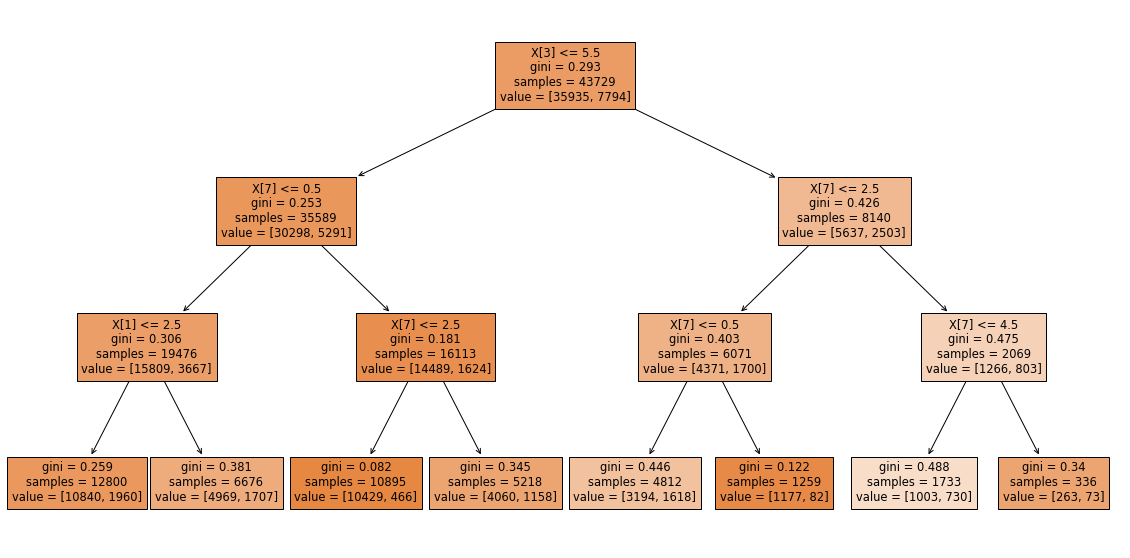

In [ ]:
#모형적합
from sklearn import tree
import matplotlib.pyplot as plt


dtree = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=50)
fit_dtree = dtree.fit(x_train, y_train)

#출력변수 범주화
y_test_fac, y_test_levels = pd.factorize(y_test)

#모형 확인
plt.figure(figsize=(20,10))
tree_plot = tree.plot_tree(fit_dtree, filled=True)

In [ ]:
#검정자료예측
pred_dtree = fit_dtree.predict(x_test)

In [ ]:
#정오분류표
pd.crosstab(y_test, pred_dtree)

col_0,0.0
가해자신체상해정도_범주,
0.0,15401
1.0,3341


In [ ]:
#예측확률
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fit_dtree.predict_proba(x_test)

array([[0.74430797, 0.25569203],
       [0.74430797, 0.25569203],
       [0.846875  , 0.153125  ],
       ...,
       [0.77807589, 0.22192411],
       [0.74430797, 0.25569203],
       [0.846875  , 0.153125  ]])

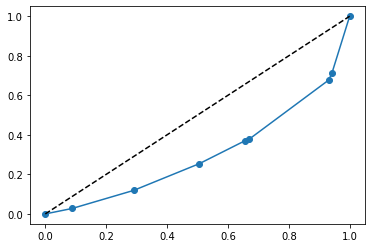

In [ ]:
#roc curve
d_func = fit_dtree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_fac, d_func)

#plot
plt.plot(fpr, tpr, 'o-')
plt.plot([0,1],[0,1],'k--')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

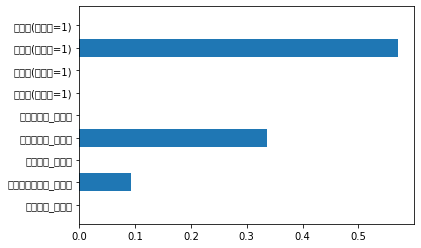

In [ ]:
#변수중요도

importances = fit_dtree.feature_importances_
idx = x_train.columns

plt.barh(idx, importances)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()
fit_logistic = logistic.fit(x_train, y_train)

pred_logistic=fit_logistic.predict(x_test)
pd.crosstab(y_test, pred_logistic)

col_0,0.0
가해자신체상해정도_범주,
0.0,15401
1.0,3341


In [ ]:
import easygui

ModuleNotFoundError: ignored

In [ ]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf', random_state=0, gamma='auto',C=1)
fit_svc=svc.fit(x_train, y_train)